# Trabalho Final - Análise de Dados com Python

 Integrantes

*RM358421 - Julio C. Falco
*RM357043 - Laura Munhoz Friozi
*RM358133 - Cristian Eugenio Maximiliano Insfrán
*RM358275 - J.C. Kenji

### Enunciado

A QuantumFinance possui um modelo de risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mau pagadores e gerando problemas financeiros para a companhia.

O objetivo é realizar uma análise exploratória para compreender o comportamento dos dados e tentar descobrir um padrão que explique e diferencie clientes bons de maus pagadores.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

2. Responder as seguintes perguntas:

    * 2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 
    * 2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
    * 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
    * 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
    * 2.5 A idade interfere na classificação do pagador?

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.


## Exploração de Dados

Bibliotecas

In [100]:

import numpy as np
import pandas as pd
import seaborn as sbn
import pandas
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns




Lendo dados

In [101]:

df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)
df.head()

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_73290/1655159283.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Exploracao de dados . Geramos uma matrix de correlao para entender como duas variaveis estao associadas. E geramos um relatório Sweetviz para análise exploratória.

,id_cliente,dia_pagamento,quant_cartoes_adicionais,tipo_endereco_postal,estado_civil,quant_dependentes,nivel_educacional,nacionalidade,tipo_residencia,meses_residencia,...,tipo_ocupacao,codigo_profissao_conjuge,nivel_educacional_conjuge,flag_documento_residencial,flag_rg,flag_cpf,flag_comprovante_renda,produto,idade,meta
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


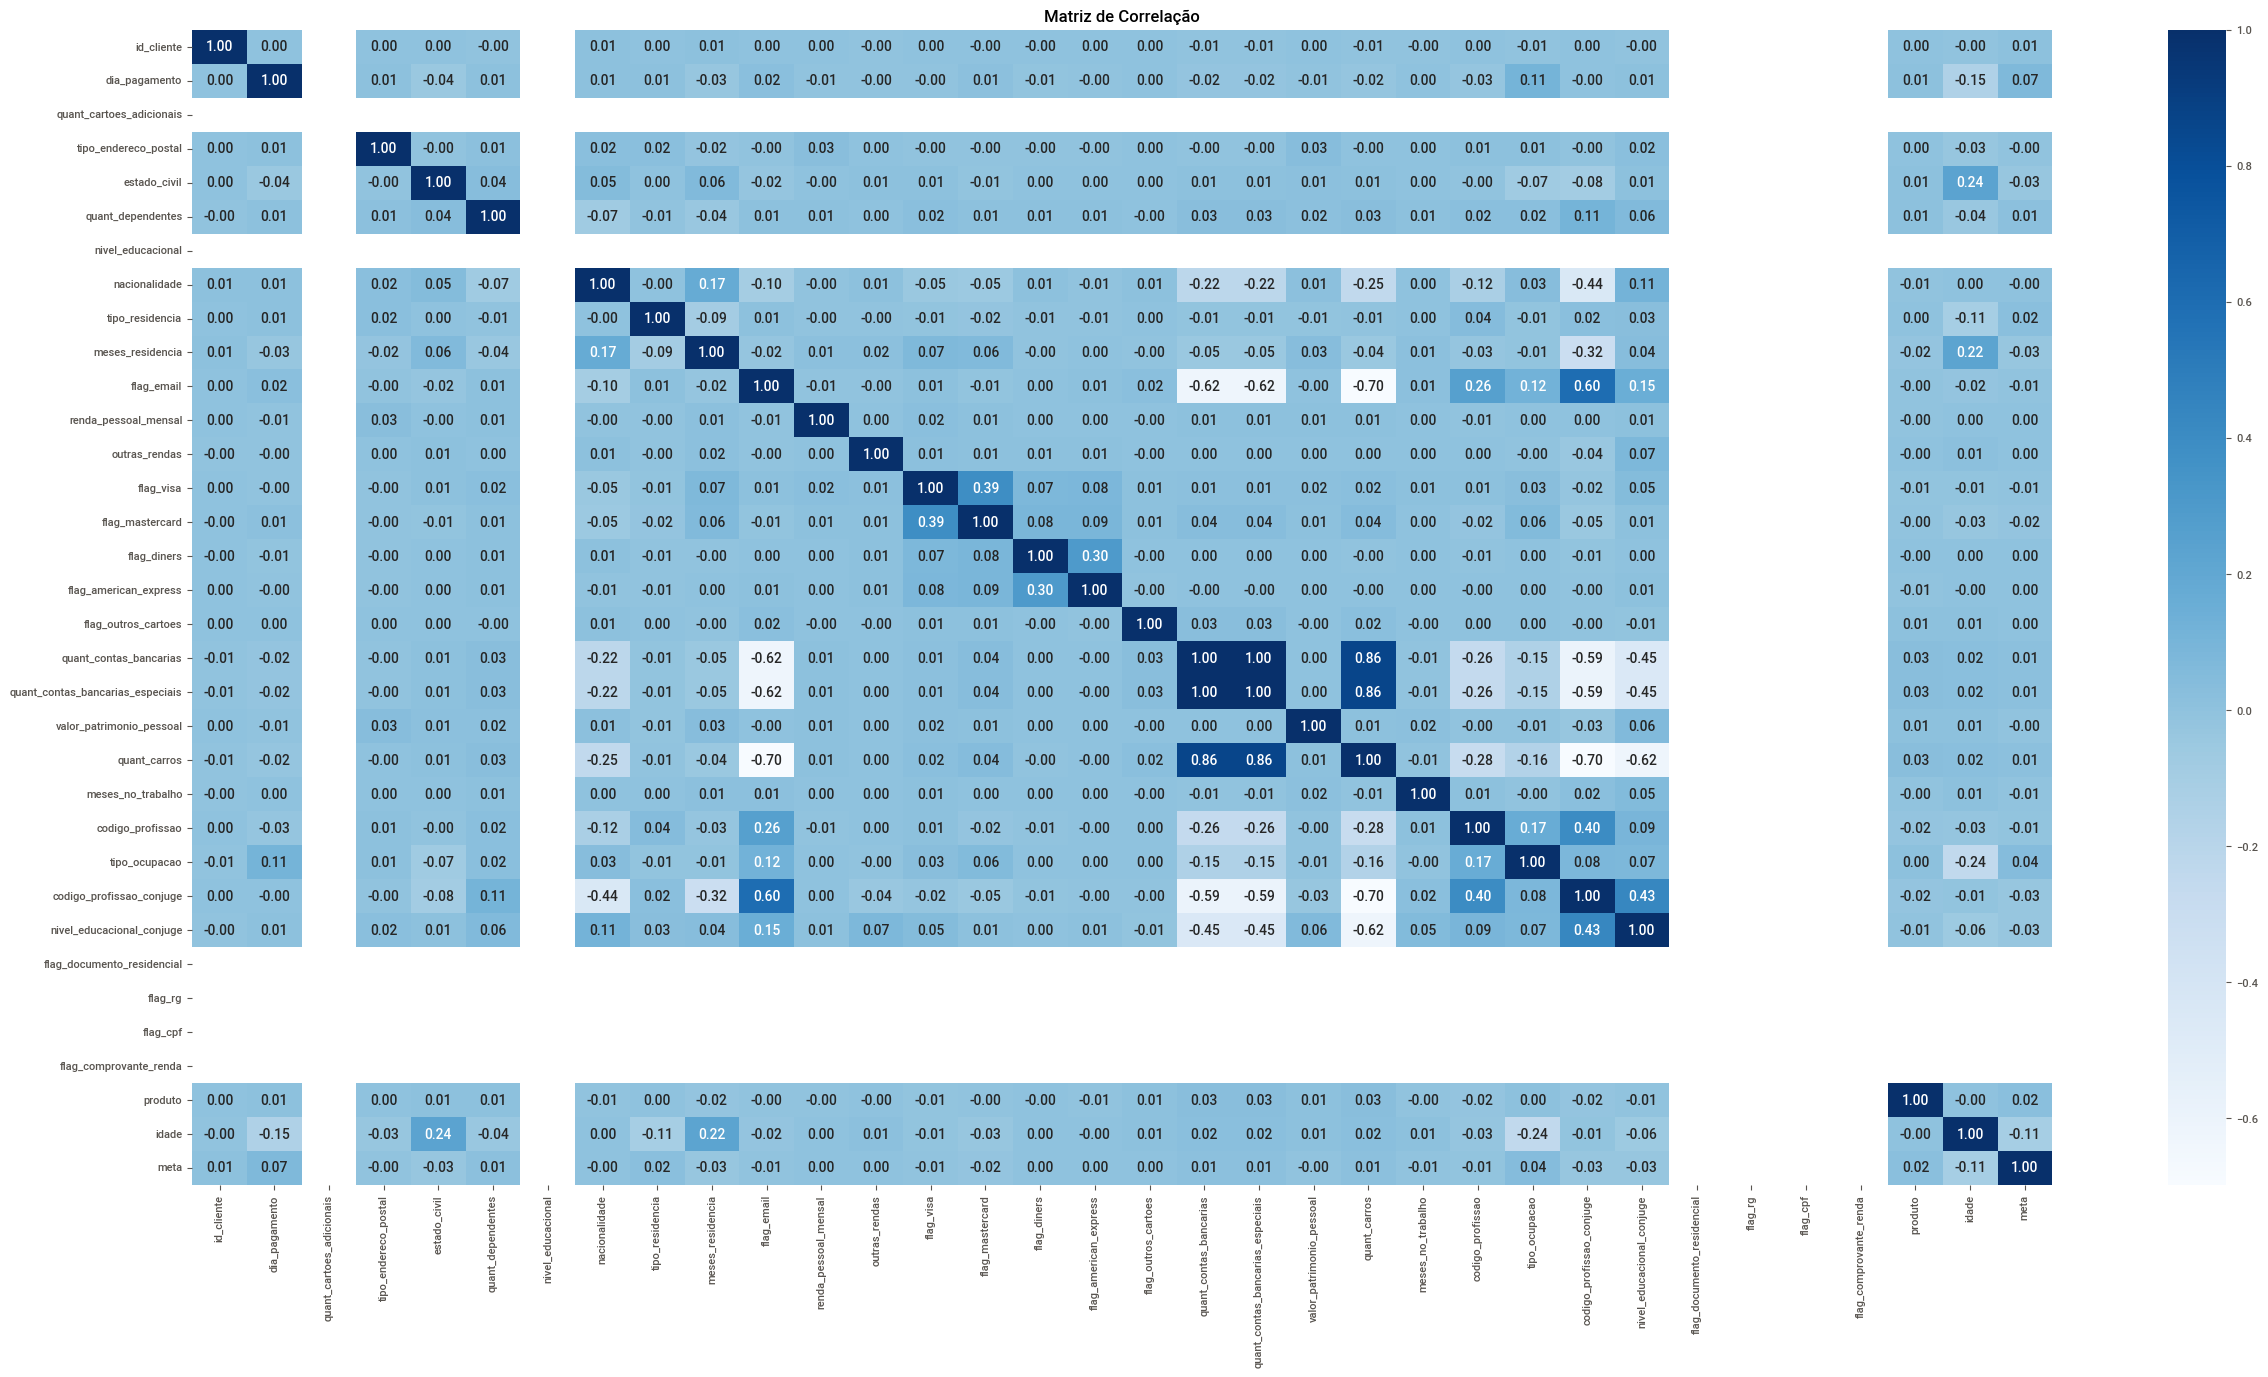

In [102]:

column_names = [
    "id_cliente", "tipo_funcionario", "dia_pagamento", "tipo_envio_aplicacao", "quant_cartoes_adicionais", 
    "tipo_endereco_postal", "sexo", "estado_civil", "quant_dependentes", "nivel_educacional", 
    "estado_nascimento", "cidade_nascimento", "nacionalidade", "estado_residencial", "cidade_residencial", 
    "bairro_residencial", "flag_telefone_residencial", "codigo_area_telefone_residencial", "tipo_residencia", 
    "meses_residencia", "flag_telefone_movel", "flag_email", "renda_pessoal_mensal", "outras_rendas", 
    "flag_visa", "flag_mastercard", "flag_diners", "flag_american_express", "flag_outros_cartoes", 
    "quant_contas_bancarias", "quant_contas_bancarias_especiais", "valor_patrimonio_pessoal", "quant_carros", 
    "empresa", "estado_profissional", "cidade_profissional", "bairro_profissional", "flag_telefone_profissional", 
    "codigo_area_telefone_profissional", "meses_no_trabalho", "codigo_profissao", "tipo_ocupacao", 
    "codigo_profissao_conjuge", "nivel_educacional_conjuge", "flag_documento_residencial", "flag_rg", 
    "flag_cpf", "flag_comprovante_renda", "produto", "flag_registro_acsp", "idade", "cep_residencial_3", 
    "cep_profissional_3", "meta"
]
df.columns = column_names

df.columns

display(df.describe())

correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Matriz de Correlação")
plt.show()


Relatório Sweetviz para analise exploratória

In [103]:

df["cep_residencial_3"] = pd.to_numeric(df["cep_residencial_3"], errors="coerce")
df["cep_profissional_3"] = pd.to_numeric(df["cep_profissional_3"], errors="coerce")


report = sv.analyze(df)
report.show_html("relatorio_sweetviz.html")
print("Relatório Sweetviz gerado: relatorio_sweetviz.html")

                                             |          | [  0%]   00:00 -> (? left)

Report relatorio_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Relatório Sweetviz gerado: relatorio_sweetviz.html


# 1. Explorar e analisar os dados para compreender a distribuição das características e a relação com a classificação de cada cliente. Como classificar os clientes

Matriz de Correlação
- Revelou correlação positiva entre renda e patrimônio.
- Não indicou relação linear forte entre variáveis e inadimplência.

Análise Exploratória
- 60% dos clientes são do sexo feminino e não possuem dependentes.
- Maior concentração de clientes entre 30 e 40 anos.

# 2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 

RESPOSTA: Os gráficos mostram a distribuição de bons e maus pagadores para as variáveis sexo, estado civil, número de dependentes e nível educacional. Com base neles, podemos começar a identificar padrões:

Sexo: A distribuição de bons e maus pagadores parece semelhante entre homens e mulheres, sugerindo que o gênero, por si só, não é um fator determinante para a inadimplência.

Estado Civil: A categoria 2 apresenta o maior índice de bons pagadores. No entanto, não é possível determinar o significado exato de cada valor das variáveis de estado civil (0, 1, 2, 3, 4, 5, 6, 7) com base nos dados fornecidos. É importante destacar que, no Brasil, oficialmente existem apenas cinco estados civis reconhecidos: solteiro, casado, separado, divorciado e viúvo. Isso sugere que pode haver uma codificação adicional ou agrupamentos específicos que precisam ser esclarecidos para uma análise mais precisa.

Número de Dependentes: O aumento no número de dependentes pode estar relacionado a um maior risco de inadimplência, possivelmente devido ao impacto financeiro de mais pessoas na renda familiar.

Nível Educacional: Nível educacional em ordem gradual não informado. Nao usamos essa variavel, pois esta com 0 em todo o dataset.

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_73290/1677836500.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


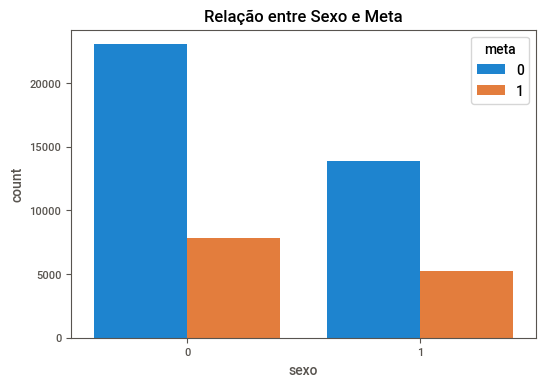

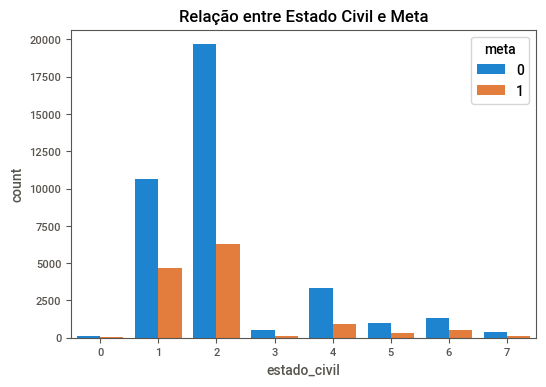

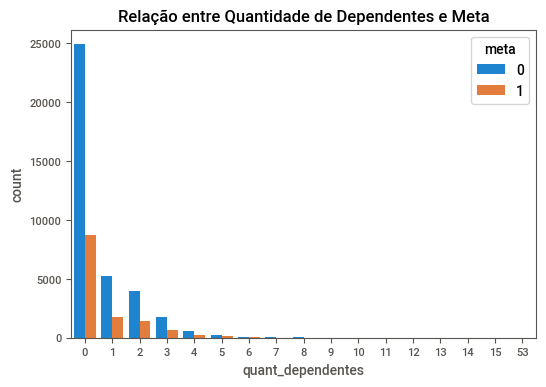

In [104]:
#2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 

df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)
df.head()
column_names = [
    "id_cliente", "tipo_funcionario", "dia_pagamento", "tipo_envio_aplicacao", "quant_cartoes_adicionais", 
    "tipo_endereco_postal", "sexo", "estado_civil", "quant_dependentes", "nivel_educacional", 
    "estado_nascimento", "cidade_nascimento", "nacionalidade", "estado_residencial", "cidade_residencial", 
    "bairro_residencial", "flag_telefone_residencial", "codigo_area_telefone_residencial", "tipo_residencia", 
    "meses_residencia", "flag_telefone_movel", "flag_email", "renda_pessoal_mensal", "outras_rendas", 
    "flag_visa", "flag_mastercard", "flag_diners", "flag_american_express", "flag_outros_cartoes", 
    "quant_contas_bancarias", "quant_contas_bancarias_especiais", "valor_patrimonio_pessoal", "quant_carros", 
    "empresa", "estado_profissional", "cidade_profissional", "bairro_profissional", "flag_telefone_profissional", 
    "codigo_area_telefone_profissional", "meses_no_trabalho", "codigo_profissao", "tipo_ocupacao", 
    "codigo_profissao_conjuge", "nivel_educacional_conjuge", "flag_documento_residencial", "flag_rg", 
    "flag_cpf", "flag_comprovante_renda", "produto", "flag_registro_acsp", "idade", "cep_residencial_3", 
    "cep_profissional_3", "meta"
]
df.columns = column_names

df.columns

#  Sexo
df["sexo"] = df["sexo"].astype(str).str.strip()
df = df[df["sexo"].isin(["F", "M"])]
df["sexo"] = df["sexo"].map({"F": 0, "M": 1})

plt.figure(figsize=(6, 4))
sns.countplot(x="sexo", hue="meta", data=df)
plt.title("Relação entre Sexo e Meta")
plt.show()

#  Estado Civil
plt.figure(figsize=(6, 4))
sns.countplot(x="estado_civil", hue="meta", data=df)
plt.title("Relação entre Estado Civil e Meta")
plt.show()

# Quantidade de Dependentes
plt.figure(figsize=(6, 4))
sns.countplot(x="quant_dependentes", hue="meta", data=df)
plt.title("Relação entre Quantidade de Dependentes e Meta")
plt.show()





# 2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
RESPOSTA: Utilizamos dois graficos de barras empilhadas, um com valores e outro com porcentagens.  

São Paulo (SP):
- Tem o maior número absoluto de maus pagadores (2.287), seguido por bons pagadores (6.486), devido ao tamanho da população e volume de crédito concedido.

Sergipe (SE):
- Apesar de um volume menor de clientes, possui um número significativo de maus pagadores (123), o que levanta a hipótese de uma proporção relativa mais alta.

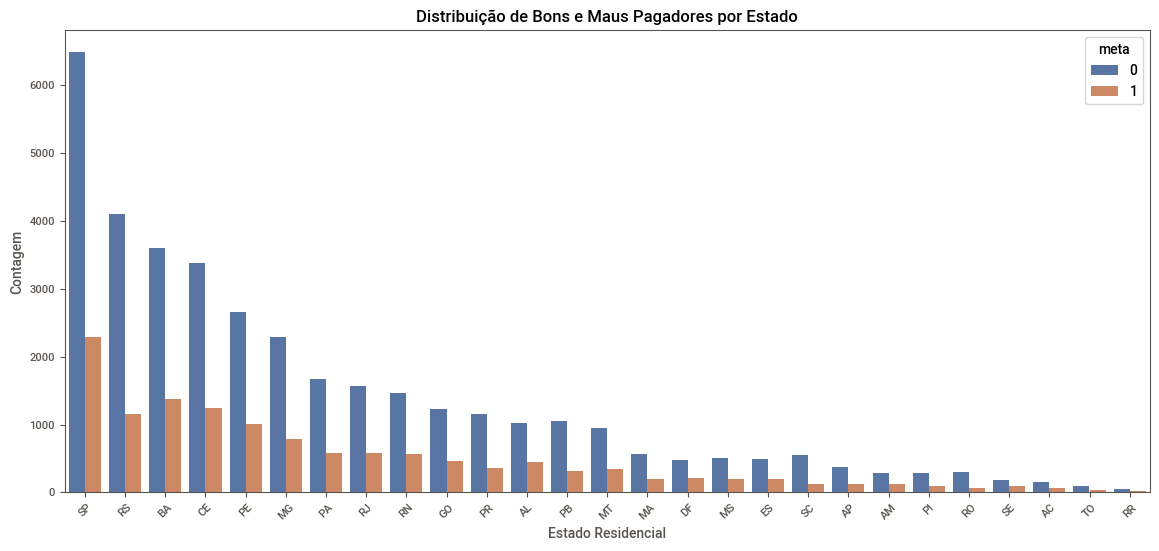

In [111]:

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="estado_residencial", hue="meta", palette="deep", order=df["estado_residencial"].value_counts().index)
plt.title("Distribuição de Bons e Maus Pagadores por Estado")
plt.xlabel("Estado Residencial")
plt.ylabel("Contagem")
plt.xticks(rotation=45)  
plt.show()


# 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
RESPOSTA: O boxplot mostra que o tipo de residência para a maioria dos tipos de residência (0, 1, 2, 4 e 5), não há uma diferença significativa na proporção de bons (0) e maus (1) pagadores, sugerindo que o tipo de residência não influencia muito a classificação. A categoria 3 é atípica, com baixa frequência, o que pode indicar dados raros ou mal registrados. É importante investigar o significado das categorias e avaliar se a categoria 3 possui inconsistências

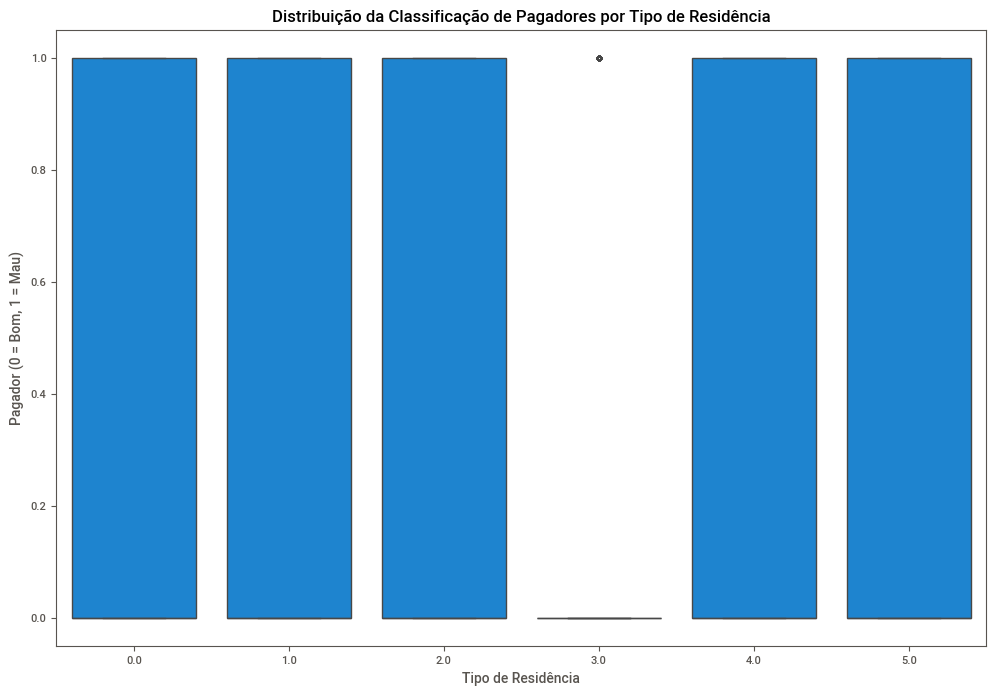

In [106]:
# 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador


plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo_residencia', y='meta', data=df)
plt.title('Distribuição da Classificação de Pagadores por Tipo de Residência')
plt.xlabel('Tipo de Residência')
plt.ylabel('Pagador (0 = Bom, 1 = Mau)')
plt.show()


# 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
RESPOSTA: O gráfico mostra que a renda pessoal mensal tende a ser um pouco maior para bons pagadores, enquanto as outras rendas não apresentam diferença significativa entre as classificações. Em ambos os casos, a maioria dos clientes possui rendas baixas, com poucos outliers representando valores muito altos. A renda pessoal pode ser um indicador relevante, mas as outras rendas parecem não influenciar na distinção entre bons e maus pagadores.

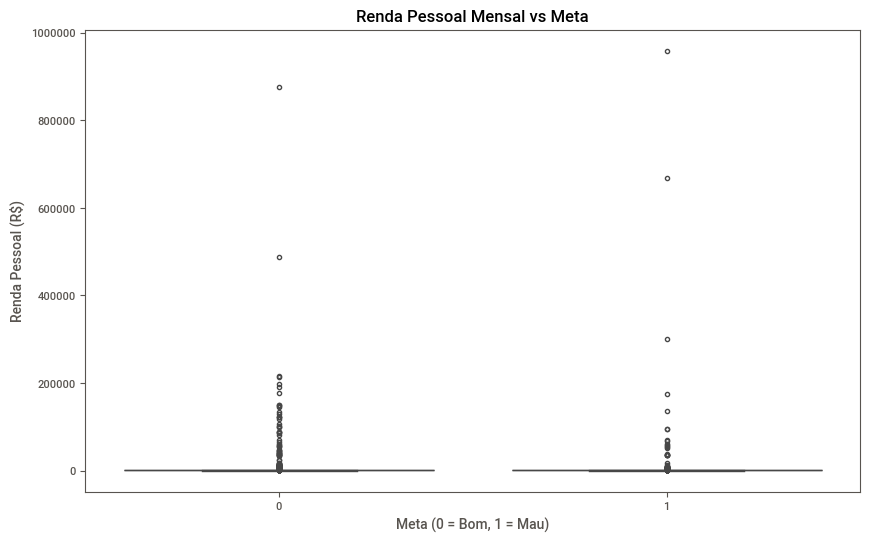

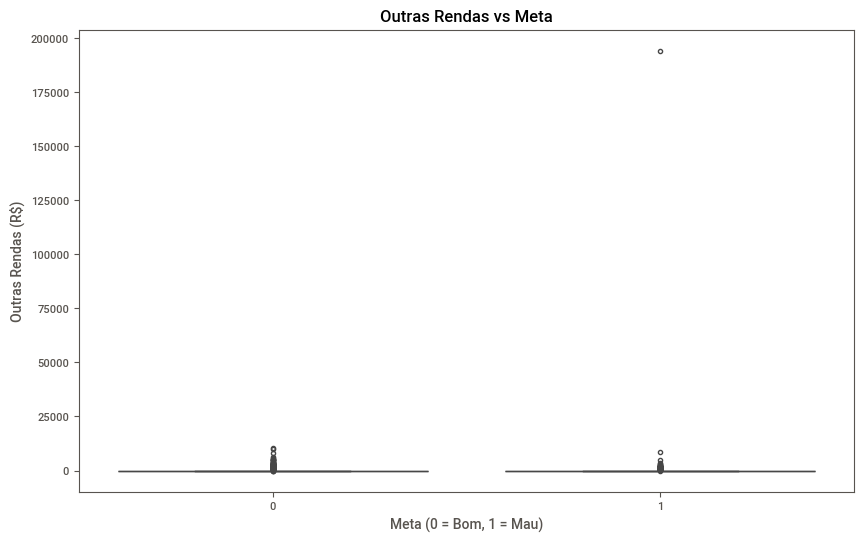

In [112]:
# 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)


# Renda Pessoal vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='meta', y='renda_pessoal_mensal', data=df)
plt.title('Renda Pessoal Mensal vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Renda Pessoal (R$)')
plt.show()

# Outras Rendas vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='meta', y='outras_rendas', data=df)
plt.title('Outras Rendas vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Outras Rendas (R$)')
plt.show()



# 2.5  A idade interfere na classificação do pagador?
RESPOSTA: Sim, a idade interfere na classificação do pagador: Jovens têm maior probabilidade de serem maus pagadores. A adimplência aumenta entre adultos e idosos, sugerindo que idade e experiência financeira podem ser fatores determinantes na capacidade de pagamento.


Bom Pagador (0):
- Idade média: 44,21 anos.
- Mediana: 43 anos.
- Faixa interquartil (25%-75%): 32 a 55 anos.

Mau Pagador (1):
- Idade média: 40,53 anos.
- Mediana: 38 anos.
- Faixa interquartil (25%-75%): 29 a 49 anos.



Jovens (abaixo de 30 anos):

- Proporcionalmente, a quantidade de maus pagadores é maior entre os jovens. Isso sugere que essa faixa etária apresenta maior risco de inadimplência, possivelmente devido à menor experiência financeira ou instabilidade econômica.

Adultos (30 a 60 anos):

- A maior concentração de bons pagadores está nesta faixa, indicando maior estabilidade financeira e capacidade de pagamento. Os maus pagadores também estão presentes, mas em menor proporção comparada aos jovens.

Idosos (acima de 60 anos):

- A frequência de clientes em geral diminui com a idade. Ainda assim, bons pagadores são mais frequentes entre os idosos do que maus pagadores, o que pode ser explicado por maior patrimônio acumulado ou despesas mais controladas.



        count       mean        std  min   25%   50%   75%    max
meta                                                             
0     36917.0  44.209930  14.956562  6.0  32.0  43.0  55.0  100.0
1     13018.0  40.538024  14.745532  7.0  29.0  38.0  49.0  106.0


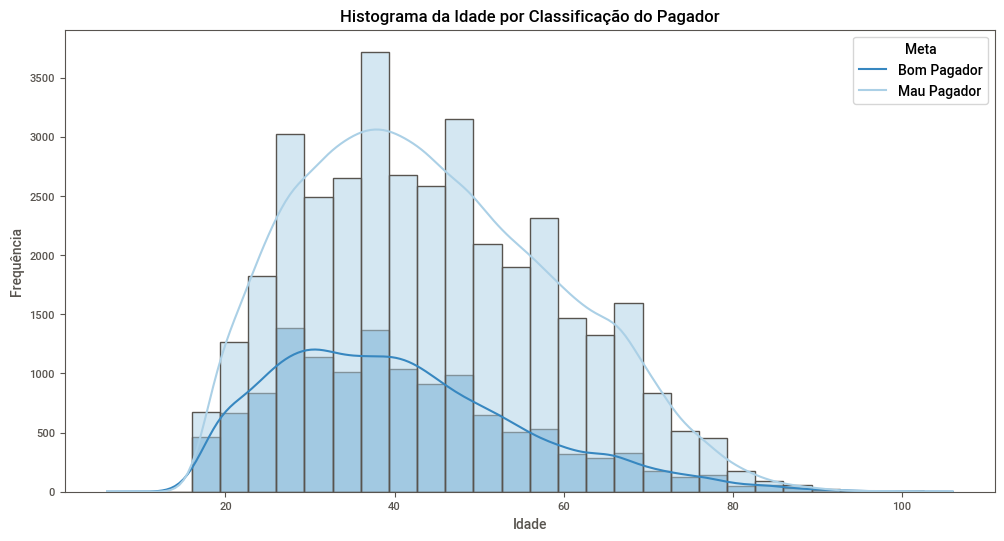

In [113]:

df["idade"] = pd.to_numeric(df["idade"], errors="coerce")
df["meta"] = pd.to_numeric(df["meta"], errors="coerce")

df_filtered = df.dropna(subset=["idade", "meta"])

resumo = df.groupby('meta')['idade'].describe()
print(resumo)

plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x="idade", hue="meta", kde=True, element="bars", bins=30, palette="Blues")
plt.title("Histograma da Idade por Classificação do Pagador")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend(title="Meta", labels=["Bom Pagador", "Mau Pagador"])
plt.show()

